# Random Forests
Random forests is a powerful machine learning model based on an ensemble of decision trees, where each tree is grown using a random subset of the data set. The final prediction of the model is based on a majority voting (for classification) or averaging (for regression) of the predictions of the trees in the forest.

## Background: Bagging Methods
The training of random forests is based on the general technique of boostrap aggregating (or bagging) applied to decision trees.

Given a training set of $n$ samples ${(x_i, y_i)}, i = 1, \cdots, n$, bagging repeatedly selects a random sample with replacement of the training set and fits the same base model (a decision tree in our case) to these samples. The number of trees in the ensemble and the number of samples used to train each one are hyperparameters of the model. Typically, a few hundred to several thousand trees are used, depending on the size and nature of the training set.

## From Bagging to Random Forests
Random forests include another type of bagging scheme: they consider only a random subset of the features when searching for the best split at each node of the decision tree. This process further reduces the correlation between the trees in the forest, which in turn decreases the variance of the model and improves its overall performance.

Typically, in a data set with $m$ features, $\sqrt{m}$ features are examined in each split. In practice, this hyperparameter should be tuned with the other hyperparameters of the model (such as the number of trees and the sample size used to train them).

In [23]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [3]:
iris = load_iris()
X = iris.data[:, :2] # we only take the first two features
y = iris.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [5]:
clf = RandomForestClassifier(random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [6]:
print(f'Training set accuracy: {clf.score(X_train, y_train):.4f}')
print(f'Test set accuracy: {clf.score(X_test, y_test):.4f}')

Training set accuracy: 0.9554
Test set accuracy: 0.7895


In [7]:
params = {
    'n_estimators': [10, 50, 100, 200, 500],
    'max_depth': np.arange(3, 11),
    'max_samples': np.arange(0.5, 1.0, 0.1),
    'max_features': ['sqrt', 'log2', None]    
}

search = RandomizedSearchCV(RandomForestClassifier(random_state=42), params, n_iter=50, cv=3, n_jobs=-1)
search.fit(X_train, y_train)

print(search.best_params_)

{'n_estimators': 100, 'max_samples': 0.6, 'max_features': 'log2', 'max_depth': 3}


In [8]:
best_clf = search.best_estimator_
print(f'Train accuracy: {best_clf.score(X_train, y_train):.4f}')
print(f'Test accuracy: {best_clf.score(X_test, y_test):.4f}')

Train accuracy: 0.8214
Test accuracy: 0.8158


In [21]:
def plot_decision_boundaries(clf, X, y, feature_names, class_names, 
                             colors=['r', 'c', 'b'], markers=('s', 'o', '^')):  
    
    cmap = ListedColormap(colors)
      
    # create a mesh of n sample points in the range [x1_min, x1_max] x [x2_min, x2_max]
    n = 1000 
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1 
    x1, x2 = np.meshgrid(np.linspace(x1_min, x1_max, n), np.linspace(x2_min, x2_max, n))
    
    # find the label of each point in the mesh
    y_pred = clf.predict(np.c_[x1.ravel(), x2.ravel()])
    y_pred = y_pred.reshape(x1.shape) 
    
    # put the result into a color plot  
    plt.contourf(x1, x2, y_pred, cmap=cmap, alpha=0.4)
    
    # plot the points from the data set
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=class_names[y], style=class_names[y], 
                    palette=colors, markers=markers, edgecolor='k')
    
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.legend()

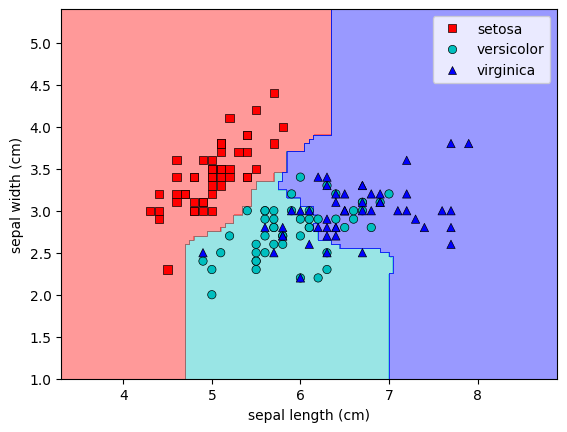

In [24]:
plot_decision_boundaries(best_clf, X, y, iris.feature_names, iris.target_names)

As can be seen, random forests are capable of finding more complex boundaries than standalone decision trees.

## RandomForestRegressor
We will now build a random forest regressor for the California housing data set. The goal in this data set is to predict the median house value of a given district (house block) in California, based on 8 different features of that district (such as the median income or the average number of rooms per household).

In [25]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor

In [26]:
data = fetch_california_housing()
X, y = data.data, data.target
feature_names = data.feature_names

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [28]:
reg = RandomForestRegressor(random_state=0)
reg.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [29]:
train_score = reg.score(X_train, y_train)
print(f'R2 score (train): {train_score:.4f}')

test_score = reg.score(X_test, y_test)
print(f'R2 score (test): {test_score:.4f}')

R2 score (train): 0.9727
R2 score (test): 0.7980


In [30]:
params = {
    'n_estimators': [10, 50, 100, 200, 500],
    'min_samples_leaf': np.arange(1, 6),
    'max_samples': np.arange(0.5, 1.0, 0.1),
    'max_features': ['sqrt', 'log2', None]    
}

search = RandomizedSearchCV(RandomForestRegressor(random_state=0), params, n_iter=50, cv=3, n_jobs=-1)
search.fit(X_train, y_train)

print(search.best_params_)

{'n_estimators': 500, 'min_samples_leaf': 1, 'max_samples': 0.8999999999999999, 'max_features': 'log2'}


In [31]:
best_reg = search.best_estimator_
print(f'R2 score (train): {best_reg.score(X_train, y_train):.4f}')
print(f'R2 score (test): {best_reg.score(X_test, y_test):.4f}')

R2 score (train): 0.9704
R2 score (test): 0.8176
